# Krypton S12 selection

### Run 5863: 17-06-2018 day
- pressure: 10 bar
- Gate voltage: 8 kV

### Selection of events in terms of S1 and S2

In [198]:
import os
import time
import glob

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.core.fit_functions as fitf
import invisible_cities.reco.dst_functions as dstf
import invisible_cities.io.dst_io as dstio
import invisible_cities.io  .kdst_io       as kdstio

from invisible_cities.core .core_functions import in_range
from invisible_cities.icaro.hst_functions  import shift_to_bin_centers

from icaro.core.fit_functions import fit_slices_1d_gauss
from icaro.core.fit_functions import expo_seed
from icaro.core.fit_functions import conditional_labels

labels = conditional_labels(with_titles)

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
import core.kr_s1s2_functions as krf
import core.kr_histo_functions as krh

### Init

In [200]:
path = f"/Users/jjgomezcadenas/Projects/ICDEV/kdst"
run_number          = 5863
input_dst_filenames = f"{path}/{run_number}/kdst*.h5"
input_dst_filename  = f"{path}/{run_number}/kdst_{run_number}.h5"

print(f"run number = {run_number}")
print(f"input dsts = {input_dst_filenames}")


run number = 5863
input dsts = /Users/jjgomezcadenas/Projects/ICDEV/kdst/5863/kdst*.h5


In [201]:
output_dst_filename  = f"{path}/{run_number}/kdst_{run_number}_s1s2.h5"
print(f"output dst = {output_dst_filename}")

output dst = /Users/jjgomezcadenas/Projects/ICDEV/kdst/5863/kdst_5863_s1s2.h5


In [202]:
print("This notebook has been run on ", time.asctime())

This notebook has been run on  Mon Jun 18 11:51:42 2018


In [203]:
#dst_full           = dstf.load_dst(input_dst_filename, "DST", "Events")
dst_full           = dstio.load_dsts(glob.glob(input_dst_filenames), "DST", "Events")
unique_events = ~dst_full.event.duplicated()

number_of_S2s_full  = np.size         (unique_events)
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of S2s   : {number_of_S2s_full} ")
print(f"Total number of events: {number_of_evts_full}")

Total number of S2s   : 1247682 
Total number of events: 1121686


In [204]:
dst_full.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z',
       'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

In [205]:
ntot = len(dst_full)

 0S2/tot  = 0.0 1S2/tot = 1.0 2S2/tot = 0.0


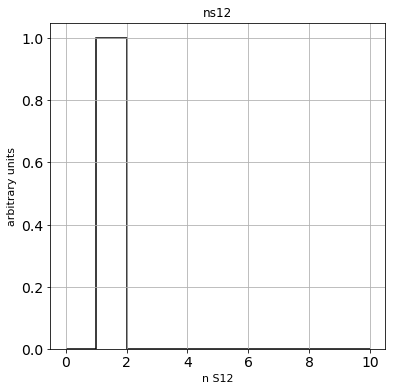

In [210]:
krf.ns12(dst_full, type='S1')

 0S2/tot  = 0.0 1S2/tot = 0.8076296684571871 2S2/tot = 0.16489297753754564


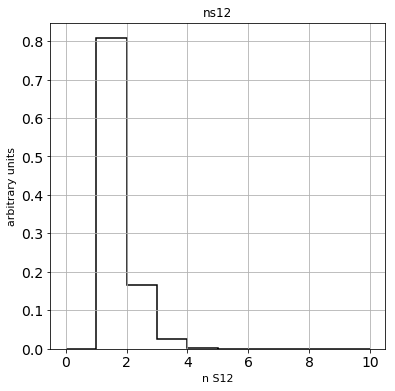

In [211]:
krf.ns12(dst_full, type='S2')

In [212]:
krf.print_ns12_stats(*krf.ns1_stats(dst_full))

ns12: mean =  1.00 sigma =  0.00
ns12 : fraction
0:  0.00
1:  1.00
2:  0.00
3:  0.00
4:  0.00


In [213]:
krf.print_ns12_stats(*krf.ns2_stats(dst_full))

ns12: mean =  1.22 sigma =  0.49
ns12 : fraction
0:  0.00
1:  0.81
2:  0.16
3:  0.02


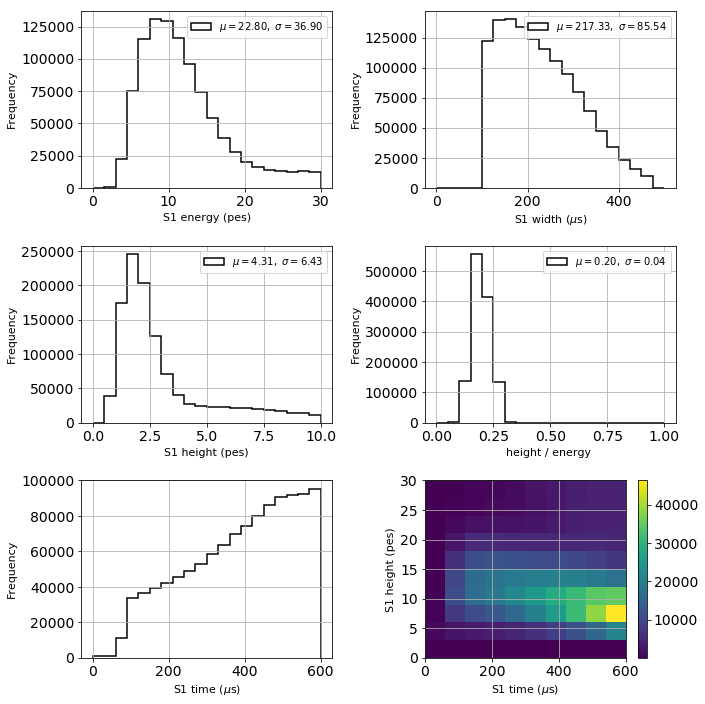

In [214]:
krf.plot_s1histos(dst_full, bins=20, figsize=(10,10))

## Select events with only 1 s1

In [189]:
dst1s1 = dst_full[dst_full.nS1==1]

In [190]:
dst2s1 = dst_full[dst_full.nS1==2]
dstms1 = dst_full[dst_full.nS1>2]

/Users/jjgomezcadenas/miniconda/envs/IC3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


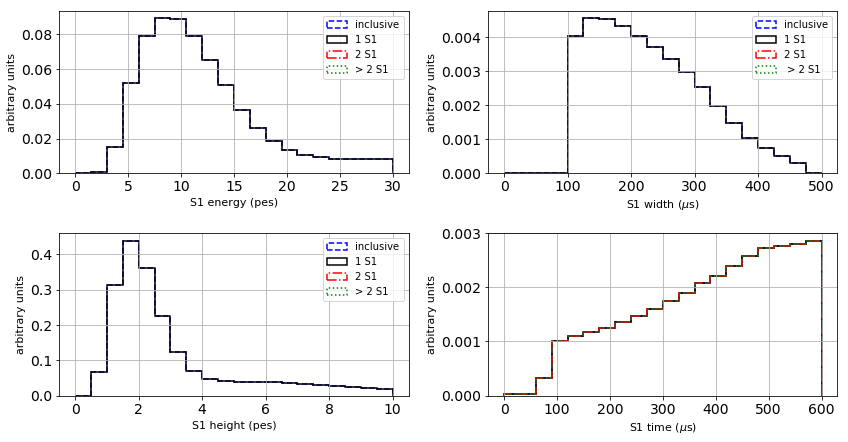

In [191]:
krf.plot_s1histos_multi(dst_full, dst1s1, dst2s1, dstms1, 
                        bins=20, figsize=(12,12))

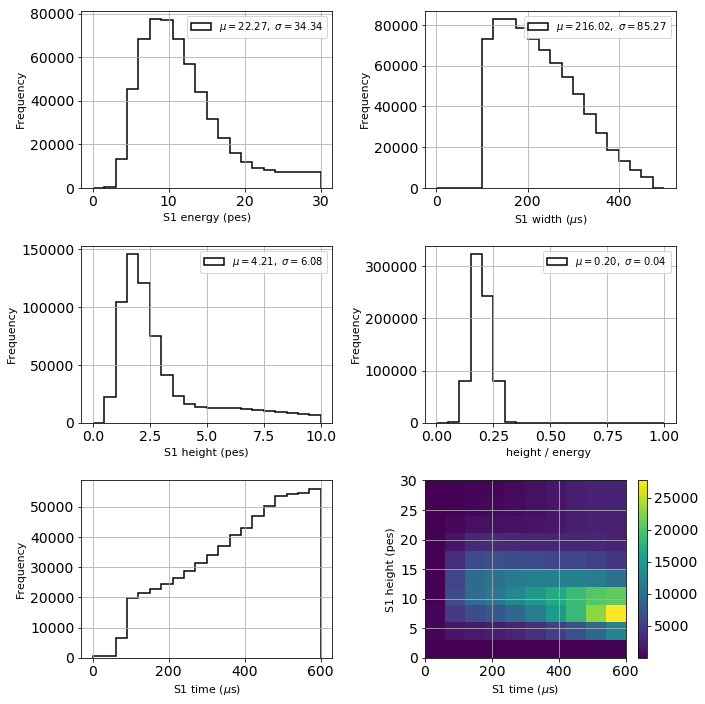

In [192]:
krf.plot_s1histos(dst1s1, bins=20, figsize=(10,10))

### Select a single S2

In [215]:
dst1s12 = dst1s1[dst1s1.nS2==1]

In [216]:
dst = dst1s12
number_of_events  = len(dst)
eff = number_of_events  / ntot 
print(f"Total number of events with 1 s1 and 1 s2 : {number_of_events}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 : 591947: selection eff = 0.47443739670845614 


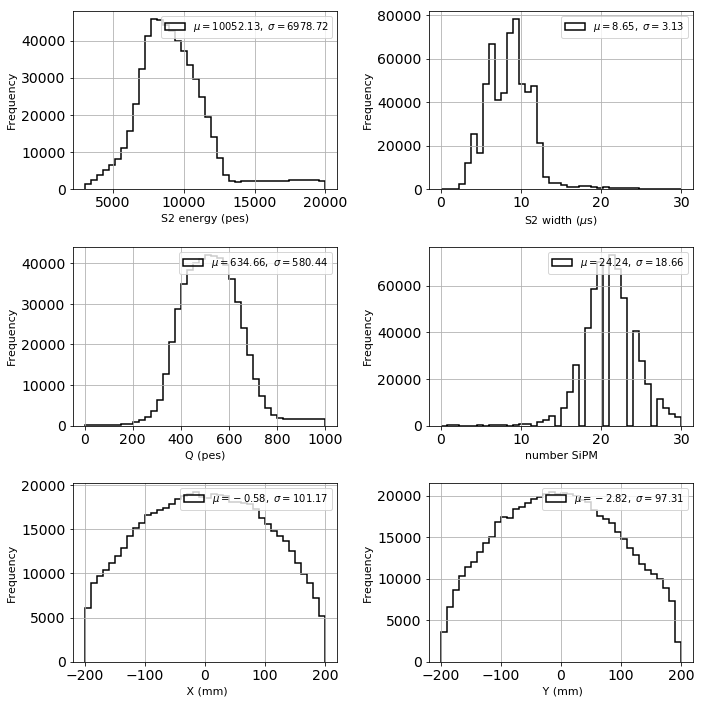

In [217]:
krf.plot_s2histos(dst1s12, bins=40, emin=3000, emax=20000, figsize=(10,10))

In [218]:
dst = dst1s12
number_of_events  = len(dst)
eff = number_of_events  / ntot 
print(f"Total number of events with 1 s1 and 1 s2 : {number_of_events}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 : 591947: selection eff = 0.47443739670845614 


In [219]:
# Unfortunately, this method can't set a specific name to the table or its title.
# It also includes an extra column ("index") which I can't manage to remove.
dst.to_hdf(output_dst_filename,
              key     = "DST"  , mode         = "w",
              format  = "table", data_columns = True,
              complib = "zlib" , complevel    = 4)

# Workaround to re-establish the name of the table and its title
with tb.open_file(output_dst_filename, "r+") as f:
    f.rename_node(f.root.DST.table, "Events")
    f.root.DST.Events.title = "Events"